# Visão Computacional: O Guia Completo - Reconhecimento Facial

# OpenCV

## Carregamento da base de dados

- Yale faces database: http://vision.ucsd.edu/content/yale-face-database

In [ ]:
!pip install opencv-contrib-python==4.8.0.76

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.10.0.84
    Uninstalling opencv-contrib-python-4.10.0.84:
      Successfully uninstalled opencv-contrib-python-4.10.0.84


In [ ]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile
path = '/content/drive/MyDrive/Cursos - recursos/Visão Computacional Guia Completo/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

## Pré-processamento das imagens

In [ ]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject14.happy.gif', 'subject02.glasses.gif', 'subject11.leftlight.gif', 'subject14.sleepy.gif', 'subject12.noglasses.gif', 'subject12.happy.gif', 'subject14.centerlight.gif', 'subject01.wink.gif', 'subject15.leftlight.gif', 'subject10.noglasses.gif', 'subject09.normal.gif', 'subject03.surprised.gif', 'subject14.leftlight.gif', 'subject10.leftlight.gif', 'subject06.glasses.gif', 'subject05.glasses.gif', 'subject09.sleepy.gif', 'subject03.rightlight.gif', 'subject01.leftlight.gif', 'subject05.rightlight.gif', 'subject09.glasses.gif', 'subject03.centerlight.gif', 'subject06.noglasses.gif', 'subject14.noglasses.gif', 'subject02.sleepy.gif', 'subject11.centerlight.gif', 'subject12.glasses.gif', 'subject04.sleepy.gif', 'subject10.normal.gif', 'subject07.sad.gif', 'subject07.normal.gif', 'subject11.surprised.gif', 'subject11.rightlight.gif', 'subject12.wink.gif', 'subject13.leftlight.gif', 'subject14.wink.gif', 'subject01.normal.gif', 'subject06.sad.gif', 'subject02.wink.gif', 'subject10.

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  #print(paths)
  faces = []
  ids = []
  for path in paths:
    #print(path)
    imagem = Image.open(path).convert('L')
    #print(type(imagem))
    imagem_np = np.array(imagem, 'uint8')
    #print(type(imagem_np))
    #print(os.path.split(path)[1])
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    #print(id)
    ids.append(id)
    faces.append(imagem_np)

  return np.array(ids), faces

In [ ]:
ids, faces = get_image_data()

In [ ]:
ids

array([14,  2, 11, 14, 12, 12, 14,  1, 15, 10,  9,  3, 14, 10,  6,  5,  9,
        3,  1,  5,  9,  3,  6, 14,  2, 11, 12,  4, 10,  7,  7, 11, 11, 12,
       13, 14,  1,  6,  2, 10, 13, 15,  2,  6, 11,  9, 12,  5,  8,  7, 10,
        4, 10, 15,  8,  6,  7, 13, 10,  7,  8, 15,  3,  4,  8, 14, 11,  6,
        8,  9, 13,  9, 14,  5, 11,  8,  6, 13, 15,  2, 12,  9,  4,  3,  8,
        6,  4, 10, 11, 11, 10,  5,  2,  8, 14,  4,  5, 13,  8, 12,  9, 15,
        1,  4, 15,  7,  1,  2,  5,  1,  7,  6,  7, 13,  7,  9,  2, 12,  5,
        1,  1,  4, 12,  4,  3, 13, 15,  1, 13,  5, 15,  2,  3,  3,  3])

In [ ]:
len(ids)

135

In [ ]:
len(faces)

135

In [ ]:
faces[1], faces[1].shape

(array([[109, 111, 123, ..., 255, 255, 241],
        [231, 237, 255, ..., 255, 255, 245],
        [252, 255, 255, ..., 255, 252, 244],
        ...,
        [255, 255, 255, ..., 188, 183, 185],
        [255, 255, 255, ..., 185, 181, 178],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

In [ ]:
ids[1]

2

In [ ]:
243 * 320, 243 * 320 * 3

(77760, 233280)

## Treinamento do classificador LBPH

In [ ]:
8 * 8, 9 * 9

(64, 81)

In [ ]:
# threshold: 1.7976931348623157e+308
# radius: 1
# neighbors: 8
# grid_x: 8
# grid_y: 8

lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=14,grid_x=9,grid_y=9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

## Reconhecimento de faces

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [ ]:
imagem_teste = '/content/yalefaces/test/subject10.sad.gif'

In [ ]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
imagem_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [ ]:
imagem_np.shape

(243, 320)

In [ ]:
previsao = lbph_face_classifier.predict(imagem_np)
previsao

(10, 6.384336446373091)

In [ ]:
previsao[0]

10

In [ ]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
saida_esperada

10

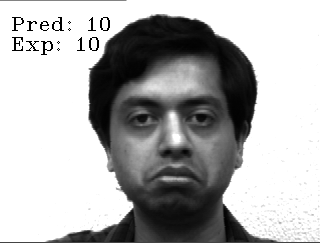

In [ ]:
cv2.putText(imagem_np, 'Pred: ' + str(previsao[0]), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'Exp: ' + str(saida_esperada), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)

## Avaliação do classificador

In [ ]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
previsoes = []
saidas_esperadas = []
for path in paths:
  #print(path)
  imagem = Image.open(path).convert('L')
  imagem_np = np.array(imagem, 'uint8')
  previsao, _ = lbph_face_classifier.predict(imagem_np)
  #print(previsao)
  saida_esperada = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
  #print(saida_esperada)

  previsoes.append(previsao)
  saidas_esperadas.append(saida_esperada)

In [ ]:
type(previsoes), type(saidas_esperadas)

(list, list)

In [ ]:
previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [ ]:
type(previsoes), type(saidas_esperadas)

(numpy.ndarray, numpy.ndarray)

In [ ]:
previsoes

array([ 4,  7,  3,  4, 12,  6,  3, 14, 13, 11,  7,  5,  4,  5,  9, 10,  4,
       14,  8,  4, 15, 11,  1,  4, 12, 14,  7, 13,  9, 12])

In [ ]:
saidas_esperadas

array([ 4,  7,  3,  2, 12,  6,  3,  6, 13, 11,  9,  5, 10,  5,  9, 10,  1,
       14,  8,  8, 15, 11,  1,  4,  2, 14, 15, 13,  7, 12])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

0.7

In [ ]:
len(previsoes)

30

In [ ]:
(30 * 70) / 100

21.0

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidas_esperadas, previsoes)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

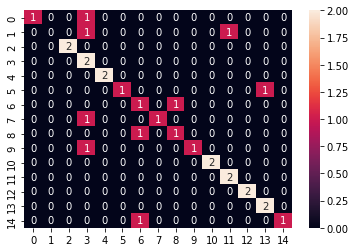

In [ ]:
import seaborn
seaborn.heatmap(cm, annot=True);

# Dlib

In [ ]:
import dlib

## Detecção de pontos faciais

In [ ]:
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor('/content/drive/MyDrive/Cursos - recursos/Visão Computacional Guia Completo/Weights/shape_predictor_68_face_landmarks.dat')

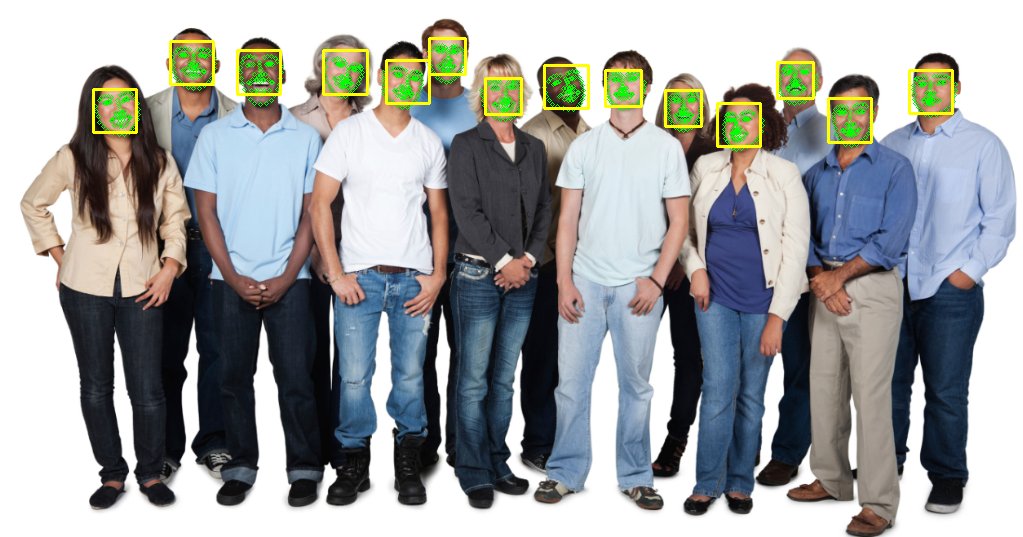

In [ ]:
imagem = cv2.imread('/content/drive/MyDrive/Cursos - recursos/Visão Computacional Guia Completo/Images/people2.jpg')
deteccoes = detector_face(imagem, 1)
for face in deteccoes:
  pontos = detector_pontos(imagem, face)
  for ponto in pontos.parts():
    cv2.circle(imagem, (ponto.x, ponto.y), 2, (0,255,0), 1)


  #print(pontos.parts())
  #print(len(pontos.parts()))

  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem, (l,t), (r, b), (0,255,255), 2)
cv2_imshow(imagem)

## Detecção de descritores faciais

In [ ]:
# Resnet: https://arxiv.org/abs/1512.03385
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor('/content/drive/MyDrive/Cursos - recursos/Visão Computacional Guia Completo/Weights/shape_predictor_68_face_landmarks.dat')
descritor_facial_extrator = dlib.face_recognition_model_v1('/content/drive/MyDrive/Cursos - recursos/Visão Computacional Guia Completo/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [ ]:
index = {}
idx = 0
descritores_faciais = None

paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  #print(path)
  imagem = Image.open(path).convert('RGB')
  imagem_np = np.array(imagem, 'uint8')
  deteccoes = detector_face(imagem_np, 1)
  for face in deteccoes:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(imagem_np, (l,t), (r,b), (0,0,255), 2)

    pontos = detector_pontos(imagem_np, face)
    for ponto in pontos.parts():
      cv2.circle(imagem_np, (ponto.x, ponto.y), 2, (0,255,0), 1)

    descritor_facial = descritor_facial_extrator.compute_face_descriptor(imagem_np, pontos)
    #print(type(descritor_facial))
    #print(len(descritor_facial))
    #print(descritor_facial)
    descritor_facial = [f for f in descritor_facial]
    #print(descritor_facial)
    descritor_facial = np.asarray(descritor_facial, dtype=np.float64)
    #print(descritor_facial)
    #print(descritor_facial.shape)
    descritor_facial = descritor_facial[np.newaxis, :]
    #print(descritor_facial.shape)
    #print(descritor_facial)

    if descritores_faciais is None:
      descritores_faciais = descritor_facial
    else:
      descritores_faciais = np.concatenate((descritores_faciais, descritor_facial), axis = 0)

    index[idx] = path
    idx += 1
  #cv2_imshow(imagem_np)

In [ ]:
descritores_faciais.shape

(132, 128)

In [ ]:
descritores_faciais

array([[-0.02849528,  0.08739689,  0.08498377, ..., -0.0445537 ,
         0.03700914,  0.02833332],
       [-0.09274021,  0.10852218,  0.02949884, ...,  0.0339697 ,
         0.07372824,  0.03597936],
       [-0.1257561 ,  0.05232358,  0.12975329, ..., -0.01692474,
         0.14553201,  0.09962083],
       ...,
       [-0.14703864,  0.09152187,  0.00213967, ..., -0.00104494,
         0.08834976,  0.01526631],
       [-0.11481768,  0.08830091,  0.04191965, ...,  0.00937112,
         0.14437041,  0.0706296 ],
       [-0.17652102,  0.15182056,  0.0158035 , ..., -0.12367861,
         0.10003915,  0.04412011]])

In [ ]:
index

{0: '/content/yalefaces/train/subject12.centerlight.gif',
 1: '/content/yalefaces/train/subject13.happy.gif',
 2: '/content/yalefaces/train/subject10.glasses.gif',
 3: '/content/yalefaces/train/subject04.sad.gif',
 4: '/content/yalefaces/train/subject01.sleepy.gif',
 5: '/content/yalefaces/train/subject12.surprised.gif',
 6: '/content/yalefaces/train/subject09.leftlight.gif',
 7: '/content/yalefaces/train/subject05.glasses.gif',
 8: '/content/yalefaces/train/subject13.leftlight.gif',
 9: '/content/yalefaces/train/subject10.rightlight.gif',
 10: '/content/yalefaces/train/subject10.sleepy.gif',
 11: '/content/yalefaces/train/subject15.noglasses.gif',
 12: '/content/yalefaces/train/subject15.glasses.gif',
 13: '/content/yalefaces/train/subject14.happy.gif',
 14: '/content/yalefaces/train/subject09.surprised.gif',
 15: '/content/yalefaces/train/subject10.surprised.gif',
 16: '/content/yalefaces/train/subject06.centerlight.gif',
 17: '/content/yalefaces/train/subject05.normal.gif',
 18: '/c

In [ ]:
len(index)

132

## Cálculo da distância entre as faces

In [ ]:
descritores_faciais[131]

array([-0.17652102,  0.15182056,  0.0158035 , -0.10957716, -0.14568812,
        0.07184243, -0.07714867, -0.08477912,  0.11031405, -0.04556603,
        0.2169341 , -0.02334847, -0.26846761, -0.00620347, -0.05472798,
        0.15201572, -0.19481716, -0.08551192, -0.10401067, -0.10759833,
        0.01963986,  0.02338588,  0.00144675,  0.1036779 , -0.11981267,
       -0.31518435, -0.12205777, -0.10016237,  0.10956538, -0.0264443 ,
       -0.08301113, -0.02548187, -0.19424212, -0.05467822,  0.03573786,
        0.01941148,  0.0454195 , -0.03834143,  0.14096692,  0.00459158,
       -0.06897033,  0.06803588,  0.11281616,  0.25951999,  0.11834906,
        0.1400688 ,  0.10765982, -0.01657359,  0.05781809, -0.18941802,
        0.06465176,  0.13933654,  0.11042494,  0.02740585,  0.01637998,
       -0.2089131 , -0.025019  ,  0.15422089, -0.12754564,  0.17324018,
        0.0857666 , -0.05463302, -0.0821671 , -0.05630552,  0.28382936,
        0.1510351 , -0.15302996, -0.17526443,  0.16509531, -0.11

In [ ]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[131])

0.0

In [ ]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[130])

0.6735747514899494

In [ ]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[129])

0.7357294456230934

In [ ]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[128])

0.7692565559949549

In [ ]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[119])

0.4106758858672823

In [ ]:
np.linalg.norm(descritores_faciais[0] - descritores_faciais, axis = 1)

array([0.        , 0.71435714, 0.77699808, 0.90265122, 0.76032728,
       0.34846013, 0.69712689, 0.57474096, 0.78946889, 0.78322287,
       0.81411472, 0.6950546 , 0.67540297, 0.85630812, 0.59838815,
       0.75457698, 0.87630544, 0.61017051, 0.74332058, 0.30940167,
       0.32572037, 0.52807607, 0.96404233, 0.91398517, 0.75578399,
       0.62067467, 0.87896107, 0.79629743, 0.67994487, 0.70876368,
       0.8648807 , 0.80494399, 0.77713592, 0.692404  , 0.66965032,
       0.63591928, 0.72970678, 0.72163726, 0.93163313, 0.59222209,
       0.80503099, 0.81324414, 0.89008151, 0.72423325, 0.79784898,
       0.75717316, 0.32957617, 0.69423952, 0.90282195, 0.78948776,
       0.7674    , 0.6272057 , 0.39270404, 0.80034934, 0.78326122,
       0.71964089, 0.73780446, 0.90265122, 0.86822934, 0.59324225,
       0.80344848, 0.69189046, 0.60655966, 0.88211755, 0.90600901,
       0.82521391, 0.72178621, 0.8956656 , 0.79958256, 0.88286795,
       0.81030839, 0.85089271, 0.6275544 , 0.8816841 , 0.83730

In [ ]:
np.argmin(np.linalg.norm(descritores_faciais[0] - descritores_faciais[1:], axis = 1))

18

In [ ]:
np.linalg.norm(descritores_faciais[0] - descritores_faciais[1:], axis = 1)[18]

0.3094016677533222

## Detecção de faces com Dlib

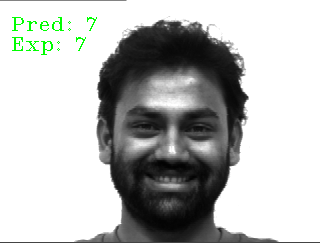

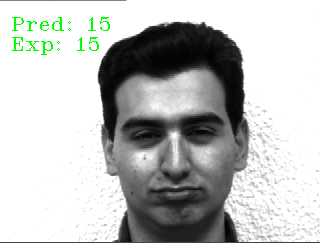

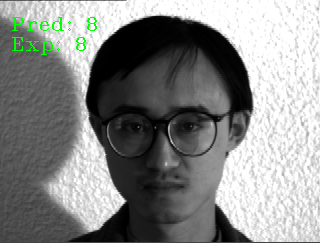

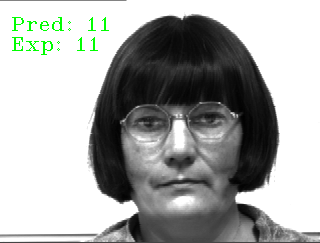

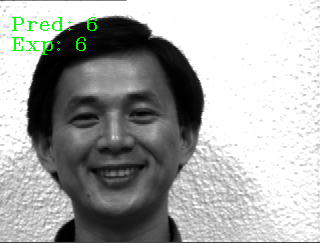

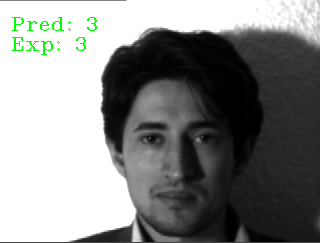

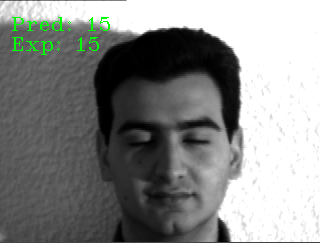

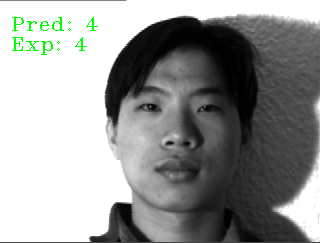

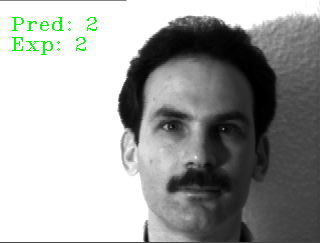

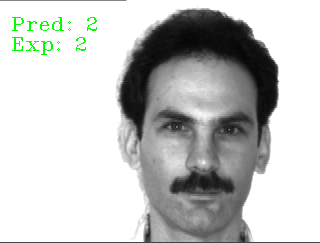

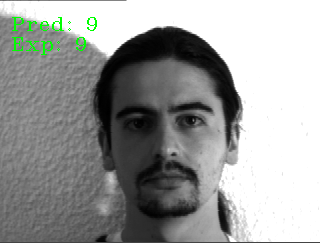

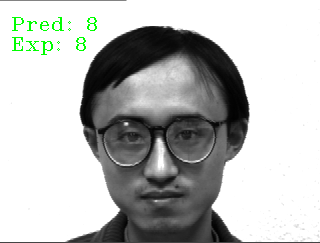

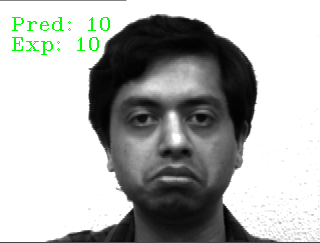

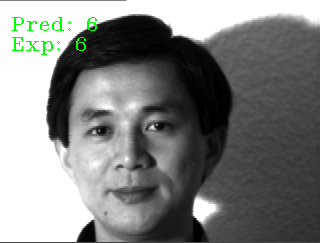

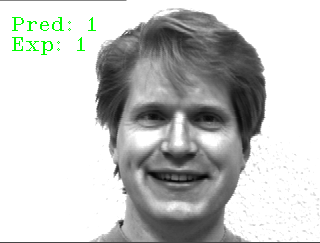

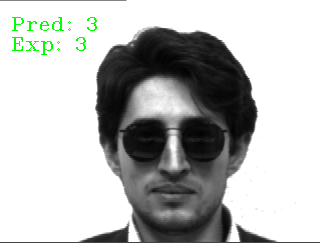

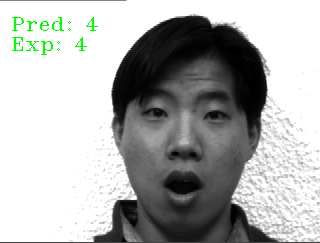

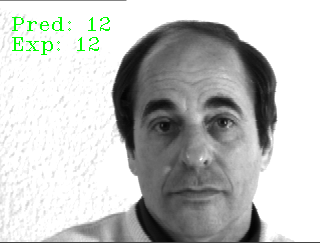

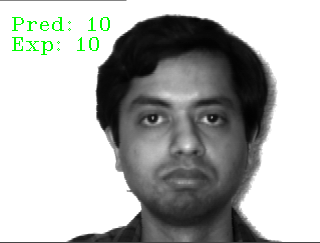

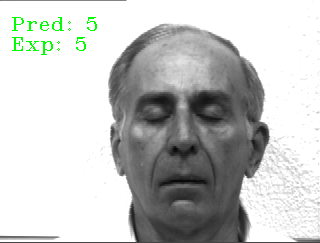

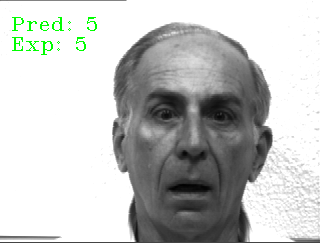

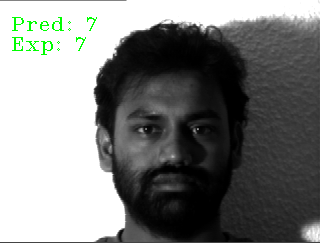

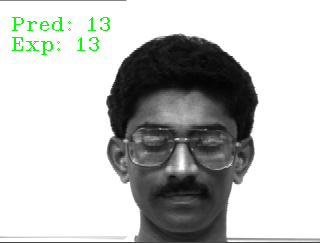

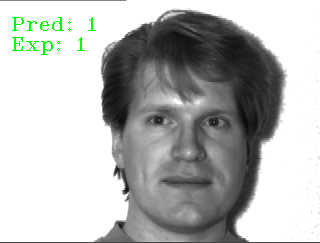

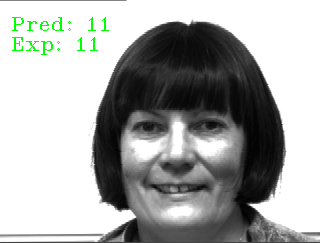

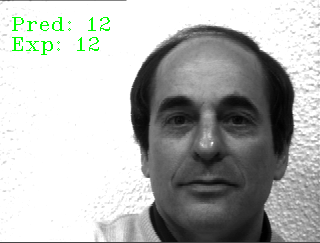

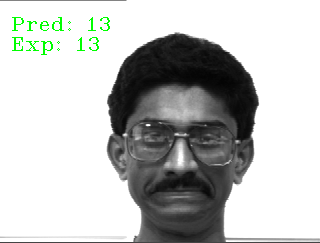

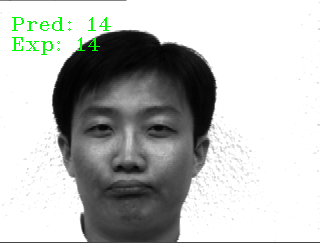

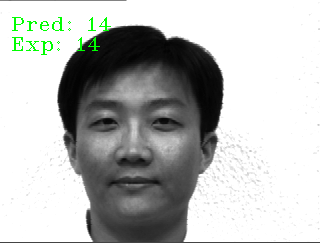

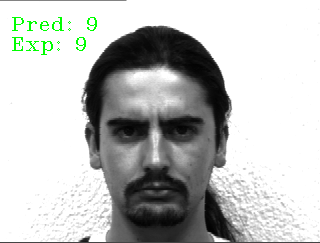

In [ ]:
confianca = 0.5
previsoes = []
saidas_esperadas = []

paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  #print(path)
  imagem = Image.open(path).convert('RGB')
  imagem_np = np.array(imagem, 'uint8')
  deteccoes = detector_face(imagem_np, 1)
  for face in deteccoes:
    pontos = detector_pontos(imagem_np, face)
    descritor_facial = descritor_facial_extrator.compute_face_descriptor(imagem_np, pontos)
    descritor_facial = [f for f in descritor_facial]
    descritor_facial = np.asarray(descritor_facial, dtype=np.float64)
    descritor_facial = descritor_facial[np.newaxis, :]

    distancias = np.linalg.norm(descritor_facial - descritores_faciais, axis = 1)
    indice_minimo = np.argmin(distancias)
    distancia_minima = distancias[indice_minimo]
    if distancia_minima <= confianca:
      nome_previsao = int(os.path.split(index[indice_minimo])[1].split('.')[0].replace('subject', ''))
    else:
      nome_previsao = 'Face não identificada'

    nome_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    previsoes.append(nome_previsao)
    saidas_esperadas.append(nome_real)

    cv2.putText(imagem_np, 'Pred: ' + str(nome_previsao), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
    cv2.putText(imagem_np, 'Exp: ' + str(nome_real), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))

  cv2_imshow(imagem_np)

previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [ ]:
previsoes

array([ 7, 15,  8, 11,  6,  3, 15,  4,  2,  2,  9,  8, 10,  6,  1,  3,  4,
       12, 10,  5,  5,  7, 13,  1, 11, 12, 13, 14, 14,  9])

In [ ]:
saidas_esperadas

array([ 7, 15,  8, 11,  6,  3, 15,  4,  2,  2,  9,  8, 10,  6,  1,  3,  4,
       12, 10,  5,  5,  7, 13,  1, 11, 12, 13, 14, 14,  9])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

1.0

# Exercício

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
path = '/content/drive/MyDrive/Cursos - recursos/Visão Computacional Guia Completo/Datasets/jones_gabriel.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/jones_gabriel', f) for f in os.listdir('/content/jones_gabriel')]
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    id = int(path.split('.')[1])

    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

In [ ]:
ids, faces = get_image_data()

In [ ]:
ids

array([2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 2])

In [ ]:
faces

[array([[ 23,  23,  23, ..., 157, 159, 161],
        [ 22,  23,  23, ..., 157, 158, 159],
        [ 22,  22,  22, ..., 158, 159, 159],
        ...,
        [126, 126, 126, ..., 152, 152, 152],
        [125, 126, 126, ..., 152, 153, 153],
        [125, 126, 126, ..., 152, 152, 153]], dtype=uint8),
 array([[ 36,  34,  33, ...,  43,  53,  60],
        [ 35,  34,  35, ...,  43,  53,  63],
        [ 39,  38,  39, ...,  45,  53,  67],
        ...,
        [ 46,  45,  45, ..., 129, 113,  87],
        [ 47,  46,  45, ..., 113,  92,  68],
        [ 46,  45,  44, ...,  94,  70,  50]], dtype=uint8),
 array([[ 26,  28,  31, ..., 105, 108, 111],
        [ 26,  28,  32, ..., 104, 106, 110],
        [ 26,  29,  33, ..., 106, 108, 112],
        ...,
        [ 28,  27,  27, ...,  93,  94,  94],
        [ 28,  27,  27, ...,  93,  94,  95],
        [ 30,  29,  28, ...,  93,  94,  95]], dtype=uint8),
 array([[107,  76,  34, ..., 154, 156, 160],
        [105,  75,  32, ...,  85,  90,  91],
        [105,  7

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

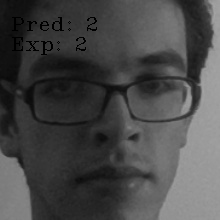

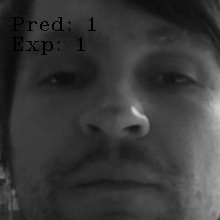

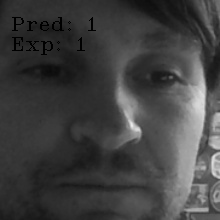

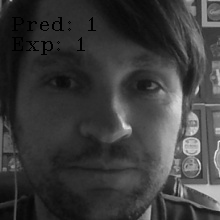

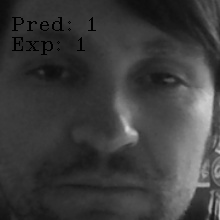

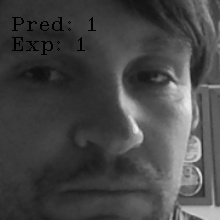

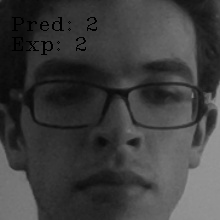

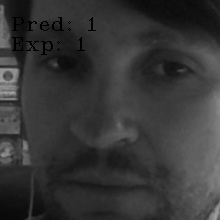

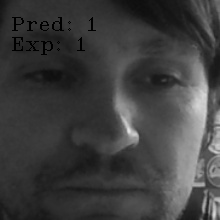

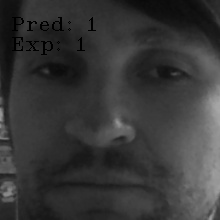

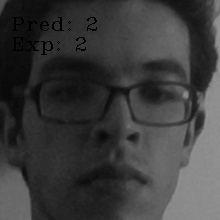

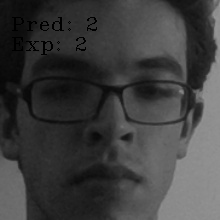

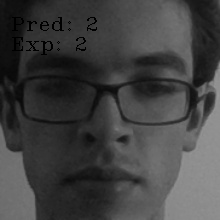

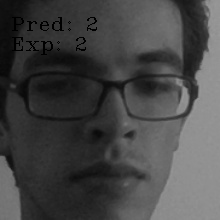

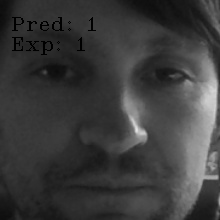

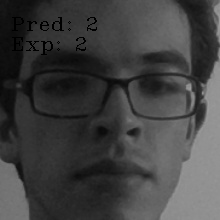

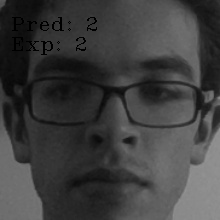

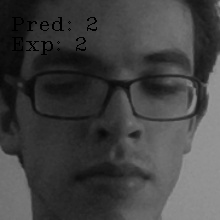

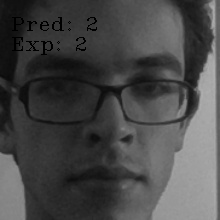

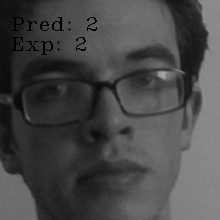

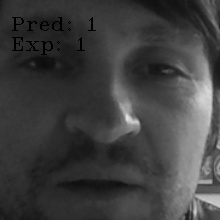

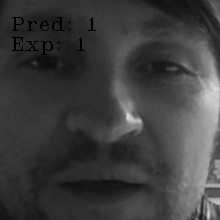

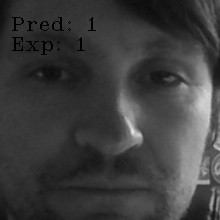

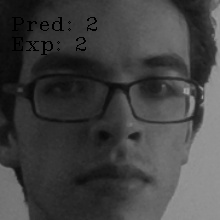

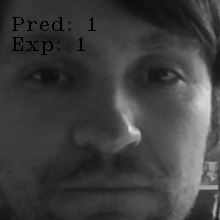

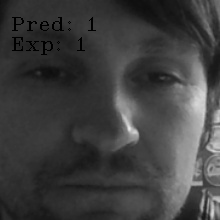

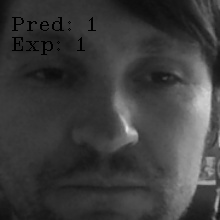

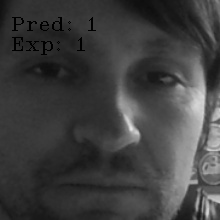

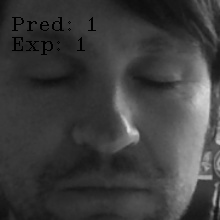

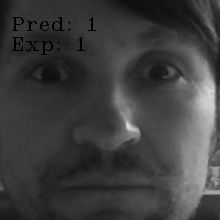

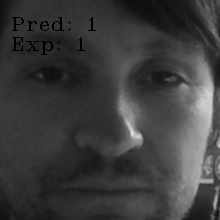

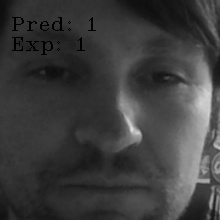

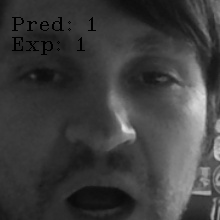

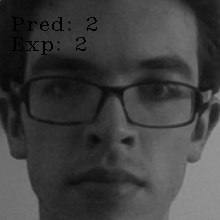

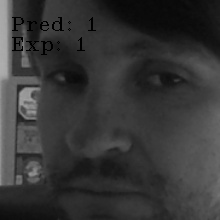

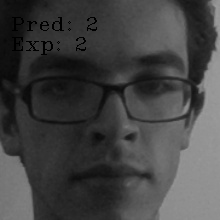

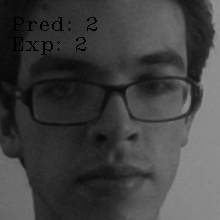

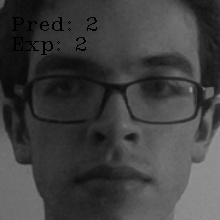

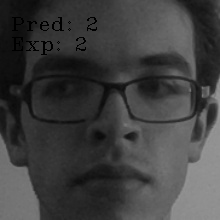

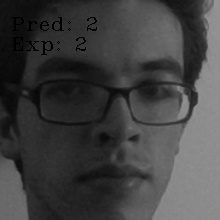

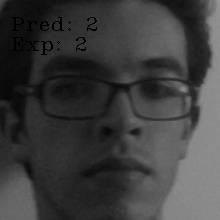

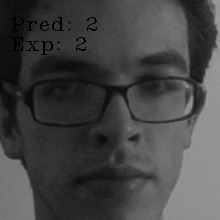

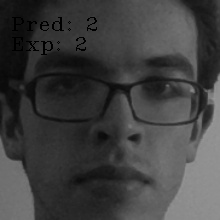

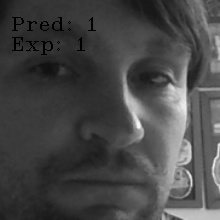

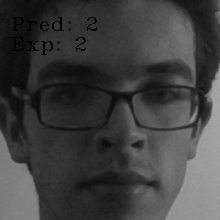

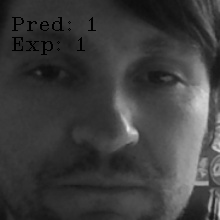

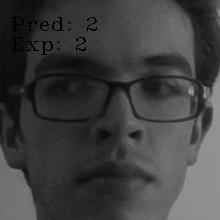

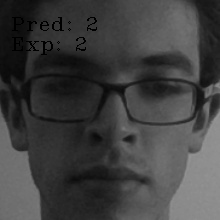

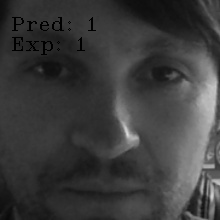

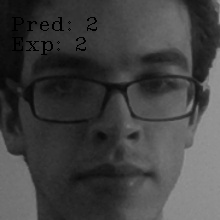

In [ ]:
paths = [os.path.join('/content/jones_gabriel', f) for f in os.listdir('/content/jones_gabriel')]
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(path.split('.')[1])

  cv2.putText(image_np, 'Pred: ' + str(prediction), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2.putText(image_np, 'Exp: ' + str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2_imshow(image_np)